In [1]:
'''Imports'''
%matplotlib widget

import numpy as np
from scipy.special import ellipk, ellipe
import matplotlib.pyplot as plt

import zigzagsum as zs
import pyvista as pv
pv.set_jupyter_backend('trame')

In [2]:
'''Figure 1'''

# Define reference unit cell
# zigzag 'beta'
theta0 = 0.000
c = np.cos(theta0)
s = np.sin(theta0)
b = 3
beta1 = np.array([0, c, s])*b
beta2 = np.array([0, c, -s])*b

# curved crease 'alpha'
# fig 1: a = 1
# fig 2: a = 0.1
a = 0.1
q = 1
npts = 40
u = np.linspace(0, 2*np.pi/q, npts)
s = a*q*np.sin(q*u)
w0 = np.vstack([np.ones(npts), s, np.zeros(npts)]).T * 2*np.pi/q/(npts-1)

# opening angle at initial zigzag
# angle zigzag edge - horizontal
# fig 1: theta = 0.0001, np.pi/8, np.pi/4*0.999
# fig 2: (np.pi/2-np.arctan(a*q))*[0.3, 0.9, 0.9999]
theta = (np.pi/2-np.arctan(a*q))*0.9999

# angle zigzag edge - zigzag edge
gamma = np.pi - 2*theta

# number of cells per parallel (along zigzag)
N = 2

# number of cells per meridian (along curved crease)
# number of unit cells
M = 2

# number of discretization points
cells = M*npts//2

# Define initial zigzag
u, v, _ = zs.zigzag(gamma, u0=beta2, v0=-beta1, w0=w0, sgnop=-1)

# Build pattern: crease vectors and vertices
U, V, W, _ = zs.manysteps(u, v, beta2, -beta1, w0, cells, sgnop=-1)
X, Y, Z = zs.integrate(U, V, W, N, per=False)

# plot
pl = pv.Plotter()
pl.enable_anti_aliasing('ssaa')
pl.set_background([0.9, 0.9, 0.9], top="white")

# fig 1
# pl. camera_position = [(21.262158865664937, 21.22357887250314, 21.223549687114335),
#  (0.03857999349612262, 3.3432634438668174e-10, -2.9185054476449704e-05),
#  (0.0, 0.0, 1.0)]

# fig 2
pl.camera_position = [(19.002972772752056, 18.998705927828915, 18.87056095348242),
 (0.004266844923142443, 8.881784197001252e-16, -0.12814497434649363),
 (0.0, 0.0, 1.0)]

pl.camera_set = True

# plot surface
grid = pv.StructuredGrid(X-np.mean(X), Y-np.mean(Y), Z-np.mean(Z))

# mark curved creases and some ruling segments
[i,j] = np.meshgrid(range(2*N+1),range(2*cells+1))

grid.point_data['i'] = i.ravel()
grid.point_data['j'] = j.ravel()

pl.add_mesh(grid, show_edges=False, color=[192, 192, 192], lighting=True, ambient=0.3, specular=0.2, metallic=1, roughness=0)

contours = grid.contour(np.linspace(np.min(i)+0.0001,np.max(i),2*N+1), scalars='i')
pl.add_mesh(contours, color = 'k', line_width=5, render_lines_as_tubes=True)

contours = grid.contour(np.linspace(np.min(j)+0.0001,np.max(j),10), scalars='j')
pl.add_mesh(contours, color = 'k', line_width=3, render_lines_as_tubes=True)

pl.show()

Widget(value="<iframe src='http://localhost:60372/index.html?ui=P_0x15fe5b6d0_0&reconnect=auto' style='width: …

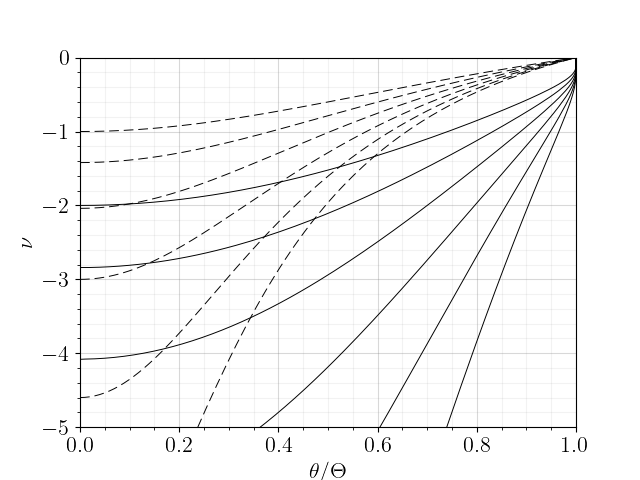

In [3]:
'''Poisson's coefficient/Figure 2'''

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 16

fig2, ax = plt.subplots()

ax.set_xlim([0, 1])
ax.set_ylim([-5, 0])

ax.set_xlabel(r'$\theta/\Theta$')
ax.set_ylabel(r'$\nu$')

ax.grid(which = 'major', alpha=0.3, color="gray")

ax.minorticks_on()
ax.grid(which = 'minor', alpha=0.1, color="gray")

s = np.hstack((np.linspace(1E-6,0.975,100),np.linspace(0.975,1,200)))

for Theta in np.arange(45,75,5)*np.pi/180:
    t = s*Theta
    k = (np.tan(t)/np.tan(Theta))**2
    nu = np.tan(t)**2/(1 + np.tan(t)**2)*ellipe(k)/(ellipe(k)-ellipk(k))
    ax.plot(s,nu,color = 'k', linewidth = 0.7)

    nu = -(1-s**2)/(1/np.tan(Theta)**2+s**2)
    ax.plot(s,nu,color = 'k', dashes = [10, 5], linewidth = 0.7)

# fig1.set_size_inches(2.5, 4.2)
fig2.savefig('poisson.png', dpi = 300)


In [4]:
'''figure 3'''

# Define reference unit cell
# zigzag 'beta'
theta0 = 0.000
c = np.cos(theta0)
s = np.sin(theta0)
b = 3
beta1 = np.array([0, c, s])*b
beta2 = np.array([0, c, -s])*b

# curved crease 'alpha'
a = 1
q = 1
npts = 40
u = np.linspace(0, 2*np.pi/q, npts)
s = a*q*np.sin(q*u)
w0 = np.vstack([np.ones(npts), s, np.zeros(npts)]).T * 2*np.pi/q/(npts-1)

# opening angle at initial zigzag
# angle zigzag edge - zigzag edge
gamma = np.pi/2

# number of cells per parallel (along zigzag)
N = 50

# number of cells per meridian (along curved crease)
# number of unit cells
M = 2

# number of discretization points
cells = M*npts//2

# Define initial zigzag
# opening theta, inclination beta, rotational symmetry of step  2 pi / N
u, v, rot, _ = zs.zigcircle(gamma, 0, N, u0=beta2, v0=-beta1, w0=w0, sgnop=-1)

# restrict pattern construction/view to 5 unit cells
N = 5

# Build pattern: crease vectors and vertices
U, V, W, _ = zs.manysteps(u, v, beta2, -beta1, w0, cells, sgnop=-1, rot=rot)
X, Y, Z = zs.integrate(U, V, W, N, per=False, rot=rot)

# plot
pl = pv.Plotter()
pl.enable_anti_aliasing('ssaa')
pl.set_background([0.9, 0.9, 0.9], top="white")

# render two 'flaps': surface and mirror image to highlight saddle shape
for flap in [-1, 1]:
    grid = pv.StructuredGrid(X, flap*Y, Z)

    [i,j] = np.meshgrid(range(2*N+1),range(2*cells+1))

    grid.point_data['i'] = i.ravel()
    grid.point_data['j'] = j.ravel()

    pl.add_mesh(grid, show_edges=False, color=[192, 192, 192], lighting=True, ambient=0.3, specular=0.2, metallic=1, roughness=0)
    
    contours = grid.contour(np.linspace(np.min(i)+0.0001,np.max(i),2*N+1), scalars='i')
    pl.add_mesh(contours, color = 'k', line_width=5, render_lines_as_tubes=True)

    contours = grid.contour(np.linspace(np.min(j)+0.0001,np.max(j),11), scalars='j')
    pl.add_mesh(contours, color = 'k', line_width=3, render_lines_as_tubes=True)

pl.show()

Widget(value="<iframe src='http://localhost:60372/index.html?ui=P_0x1683b0690_1&reconnect=auto' style='width: …

In [5]:
'''figure 3'''

# Define reference unit cell
# zigzag 'beta'
theta0 = 0.000
c = np.cos(theta0)
s = np.sin(theta0)
b = 3
beta1 = np.array([0, c, s])*b
beta2 = np.array([0, c, -s])*b

# curved crease 'alpha'
a = 1
q = 1
npts = 40
u = np.linspace(0, 2*np.pi/q, npts)
s = a*q*np.sin(q*u)
w0 = np.vstack([np.ones(npts), s, np.zeros(npts)]).T * 2*np.pi/q/(npts-1)

# initialize error and curvature
error = []
II22 = []

# opening angle at initial zigzag
for gamma in np.linspace(np.pi/2*1.001, 3*np.pi/4, 5):

    # Poisson by analytical formula
    theta = (np.pi-gamma)/2
    k = (np.tan(theta)/np.tan(np.pi/4))**2
    nu = np.tan(theta)**2/(1 + np.tan(theta)**2)*ellipe(k)/(ellipe(k)-ellipk(k))
     
    # number of cells per parallel
    for N in [50, 100, 200, 400, 800, 1600]:
        npts = N
        v = np.linspace(0, 2*np.pi/q, npts)
        s = a*q*np.sin(q*v)
        w0 = np.vstack([np.ones(npts), s, np.zeros(npts)]).T * 2*np.pi/q/(npts-1)

        # Define initial zigzag
        u, v, rot, _ = zs.zigcircle(gamma, 0, N, u0=beta2, v0=-beta1, w0=w0, sgnop=-1)

        # number of cells per meridian
        cells = npts//2

        # Build pattern: crease vectors and vertices
        U, V, W, _ = zs.manysteps(u, v, beta2, -beta1, w0, cells, sgnop=-1, rot=rot)
        X, Y, Z = zs.integrate(U, V, W, 1, per=False, rot=rot)
        
        # get vertices
        A = np.array([X[0,0], Y[0,0], Z[0,0]])
        
        B1 = np.array([X[1,0], Y[1,0], Z[1,0]])
        B1m = np.array([-X[1,0], Y[1,0], Z[1,0]])

        B2 = np.array([X[2,0], Y[2,0], Z[2,0]])
        B2m = np.array([-X[2,0], Y[2,0], Z[2,0]])

        C1 = np.array([X[0,npts//2], Y[0,npts//2], Z[0,npts//2]])
        C1m = np.array([X[0,npts//2], -Y[0,npts//2], Z[0,npts//2]])

        C2 = np.array([X[0,npts], Y[0,npts], Z[0,npts]])
        C2m = np.array([X[0,npts], -Y[0,npts], Z[0,npts]])

        normal = np.array([0.,0.,1.])

        # curvatures by finite differences
        k2 = np.dot(B2+B2m-2*A,normal)/np.linalg.norm(B1-B1m)**2
        k1 = np.dot(C2+C2m-2*A,normal)/np.linalg.norm(C1-C1m)**2
        
        # store values
        II22.append(np.dot(B2+B2m-2*A,normal)/4/b**2)
        error.append(abs(nu-k2/k1))


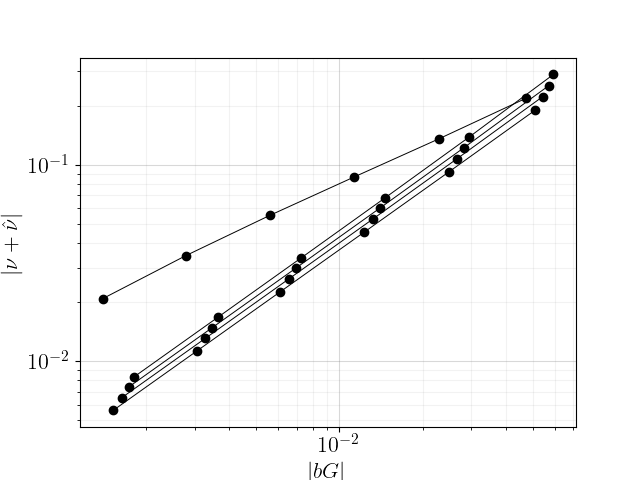

In [6]:
'''figure 3'''
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 16
plt.close('all')
fig3, ax = plt.subplots()

ax.set_xlabel(r'$|bG|$')
ax.set_ylabel(r'$|\nu+\hat\nu|$')

ax.grid(which = 'major', alpha=0.3, color="gray")

ax.minorticks_on()
ax.grid(which = 'minor', alpha=0.1, color="gray")

theta = np.linspace(np.pi/2*1.01, 3*np.pi/4, 10)
N = np.array([50, 100, 200, 400, 800, 1600])
errorarray = np.reshape(error,(5,6))
II22array = np.reshape(II22,(5,6))

for i in range(0,5):
    ax.loglog(abs(b*II22array[i,:]),errorarray[i,:],'k-o', linewidth = 0.7)

# fig3.savefig('error.png', dpi = 300)

In [7]:
'''Figure 4'''

# Build one layer
# Define reference unit cell
# zigzag 'beta'
theta0 = 0.000
c = np.cos(theta0)
s = np.sin(theta0)
b = 3
beta1 = np.array([0, c, s])*b
beta2 = np.array([0, c, -s])*b

# curved crease 'alpha'
a = 1
q = 1
npts = 40
u = np.linspace(0, 2*np.pi/q, npts)
s = a*q*np.sin(q*u)
w0 = np.vstack([np.ones(npts), s, np.zeros(npts)]).T * 2*np.pi/q/(npts-1)

# opening angle at initial zigzag
# angle zigzag edge - horizontal
theta = (np.pi/2-np.arctan(a*q))*0.9999

# angle zigzag edge - zigzag edge
gamma = np.pi - 2*theta

# number of cells per parallel (along zigzag)
N = 4

# number of cells per meridian (along curved crease)
# number of unit cells
M = 4

# number of discretization points
cells = M*npts//2

# Define initial zigzag
u, v, _ = zs.zigzag(gamma, u0=beta2, v0=-beta1, w0=w0, sgnop=-1)

# Build pattern: crease vectors and vertices
U, V, W, _ = zs.manysteps(u, v, beta2, -beta1, w0, cells, sgnop=-1)
XA, YA, ZA = zs.integrate(U, V, W, N, per=False)

# Build another layer
# Define reference unit cell
# zigzag 'beta'
theta0 = np.pi/4
c = np.cos(theta0)
s = np.sin(theta0)
b = b/np.cos(theta0)
beta1 = np.array([0, c, s])*b
beta2 = np.array([0, c, -s])*b

# curved crease 'alpha' same as before

# opening angle at initial zigzag
# angle zigzag edge - horizontal set for compatibility between layers
theta = np.arccos(np.cos(theta)*np.cos(theta0))

# angle zigzag edge - zigzag edge
gamma = np.pi - 2*theta

# Define initial zigzag
u, v, _ = zs.zigzag(gamma, u0=beta2, v0=-beta1, w0=w0, sgnop=-1)

# Build pattern: crease vectors and vertices
U, V, W, _ = zs.manysteps(u, v, beta2, -beta1, w0, cells, sgnop=-1)
XB, YB, ZB = zs.integrate(U, V, W, N, per=False)

# lattice vector in the z direction
t = np.min(ZA)-np.min(ZB)

# plot
pl = pv.Plotter()
pl.enable_anti_aliasing('ssaa')
pl.set_background([0.9, 0.9, 0.9], top="white")

pl.camera_position = [(41.647635019960674, 41.64437384002294, 44.64405775381623),
 (0.0032611799632604743, 2.5528024139021e-11, 2.9996839138188145),
 (0.0, 0.0, 1.0)]

pl.camera_set = True

for [X, Y, Z] in [[XA, YA, ZA], [XB, YB, ZB]]:
    for m in np.arange(0,4):    
        # plot surface
        grid = pv.StructuredGrid(X-np.mean(XA), Y-np.mean(YA), Z-np.mean(ZA)+m*t)

        # mark curved creases and some ruling segments
        [i,j] = np.meshgrid(range(2*N+1),range(2*cells+1))

        grid.point_data['i'] = i.ravel()
        grid.point_data['j'] = j.ravel()

        pl.add_mesh(grid, show_edges=False, color=[192, 192, 192], lighting=True, ambient=0.3, specular=0.2, metallic=1, roughness=0)

        contours = grid.contour(np.linspace(np.min(i)+0.0001,np.max(i),2*N+1), scalars='i')
        pl.add_mesh(contours, color = 'k', line_width=5, render_lines_as_tubes=True)

        contours = grid.contour(np.linspace(np.min(j)+0.0001,np.max(j),10), scalars='j')
        pl.add_mesh(contours, color = 'k', line_width=3, render_lines_as_tubes=True)

pl.show()

Widget(value="<iframe src='http://localhost:60372/index.html?ui=P_0x171815590_2&reconnect=auto' style='width: …

In [10]:
'''Fig 1 - Supplemental Material'''
# Define reference unit cell
# zigzag 'beta'
theta0 = 0.000
c = np.cos(theta0)
s = np.sin(theta0)
b = 1
beta1 = np.array([0, c, s])*b
beta2 = np.array([0, c, -s])*b

# curved crease 'alpha'
a = 1
q = 1
npts = 40
u = np.linspace(0, 1/q, npts)
s = a*(1-2*q*u)
w0 = np.vstack([np.ones(npts), s, np.zeros(npts)]).T * 1/q/(npts-1)

# opening angle at initial zigzag
# angle zigzag edge - horizontal
# theta = 0.0001, np.pi/8, np.pi/4*0.999
theta = 0.0001

# angle zigzag edge - zigzag edge
gamma = np.pi - 2*theta

# number of cells per parallel (along zigzag)
N = 2

# number of cells per meridian (along curved crease)
# number of unit cells
M = 2

# number of discretization points
cells = M*npts//2

# Define initial zigzag
u, v, _ = zs.zigzag(gamma, u0=beta2, v0=-beta1, w0=w0, sgnop=-1)

# Build pattern: crease vectors and vertices
U, V, W, _ = zs.manysteps(u, v, beta2, -beta1, w0, cells, sgnop=-1)
X, Y, Z = zs.integrate(U, V, W, N, per=False)

# plot
pl = pv.Plotter()
pl.enable_anti_aliasing('ssaa')
pl.set_background([0.9, 0.9, 0.9], top="white")

# fig 1
# pl. camera_position = [(21.262158865664937, 21.22357887250314, 21.223549687114335),
#  (0.03857999349612262, 3.3432634438668174e-10, -2.9185054476449704e-05),
#  (0.0, 0.0, 1.0)]

# fig 2
pl.camera_position = [(19.002972772752056, 18.998705927828915, 18.87056095348242),
 (0.004266844923142443, 8.881784197001252e-16, -0.12814497434649363),
 (0.0, 0.0, 1.0)]

pl.camera_set = True

# plot surface
grid = pv.StructuredGrid(X-np.mean(X), Y-np.mean(Y), Z-np.mean(Z))

# mark curved creases and some ruling segments
[i,j] = np.meshgrid(range(2*N+1),range(2*cells+1))

grid.point_data['i'] = i.ravel()
grid.point_data['j'] = j.ravel()

pl.add_mesh(grid, show_edges=False, color=[192, 192, 192], lighting=True, ambient=0.3, specular=0.2, metallic=1, roughness=0)

contours = grid.contour(np.linspace(np.min(i)+0.0001,np.max(i),2*N+1), scalars='i')
pl.add_mesh(contours, color = 'k', line_width=5, render_lines_as_tubes=True)

contours = grid.contour(np.linspace(np.min(j)+0.0001,np.max(j),3), scalars='j')
pl.add_mesh(contours, color = 'k', line_width=5, render_lines_as_tubes=True)

contours = grid.contour(np.linspace(np.min(j)+0.0001,np.max(j),11), scalars='j')
pl.add_mesh(contours, color = 'k', line_width=3, render_lines_as_tubes=True)

pl.show()

Widget(value="<iframe src='http://localhost:60372/index.html?ui=P_0x16842a550_5&reconnect=auto' style='width: …